In [1]:
from pymarketng.application.Mechanism import *
from pymarketng.application.BidManager import BidManager
from pymarketng.application.Plot import plot_demand_curves, plot_trades_as_graph

from pymarketng.domain.Bid import Bid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [17]:
# 1 Round of auction dataframe
n = 4
data = {
    "user": np.random.randint(1, 21, n),
    "type": np.random.randint(1, 4, n),
    "unit": np.random.randint(1, 100, n),
    "price": np.random.randint(0, 200, n),
    "buying": np.random.choice([True, False], n) ,
    "time": sorted([
        datetime.datetime(
            2022,
            np.random.randint(1, 13),
            np.random.randint(1, 28),
            np.random.randint(0, 24),
            np.random.randint(0, 60),
            np.random.randint(0, 60),
        )
        for _ in range(n)
    ]),
}
df = pd.DataFrame(data)
df

,user,type,unit,price,buying,time
0,1,1,93,71,True,2022-02-27 13:58:18
1,13,1,90,56,False,2022-03-26 11:08:42
2,13,1,29,57,True,2022-09-21 22:44:15
3,2,1,11,91,False,2022-11-24 09:13:46


In [18]:
bm = BidManager()

# create bids from df
for index, row in df.iterrows():
    bm.add_bid(Bid(row["price"],row["user"],row["unit"],row["buying"],row["time"]))

bm.get_df()

,user,buying,price,quantity,remaining_quantity,time,divisible
0,1,True,71,93,93,2022-02-27 13:58:18,True
1,13,True,57,29,29,2022-09-21 22:44:15,True
2,13,False,56,90,90,2022-03-26 11:08:42,True
3,2,False,91,11,11,2022-11-24 09:13:46,True


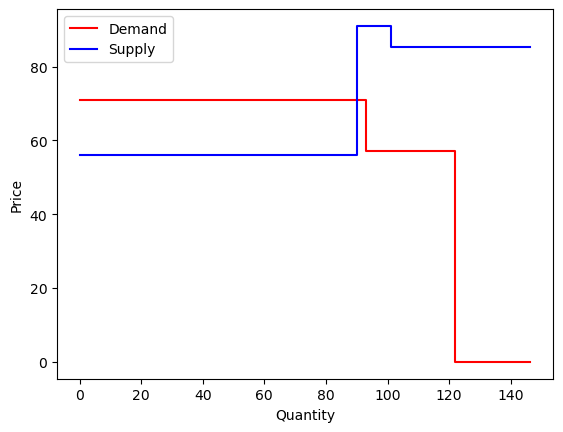

In [19]:
bm.plot()

In [20]:
bm_new,tm=bm.run(Average_Mechanism_Multi)

In [21]:
tm.get_df()

,mechanism.buy_price,mechanism.sell_price,mechanism.quantity,buyer.id,buyer.price,buyer.quantity,buyer.remaining_quantity,seller.id,seller.price,seller.quantity,seller.remaining_quantity
0,63.5,63.5,90,1,71,93,3,13,56,90,0


In [22]:
bm_new.get_df()

,user,buying,price,quantity,remaining_quantity,time,divisible
0,1,True,71,93,3,2022-02-27 13:58:18,True
1,13,True,57,29,29,2022-09-21 22:44:15,True
2,2,False,91,11,11,2022-11-24 09:13:46,True


In [24]:
bm_new,tm=bm_new.run(Average_Mechanism_Multi)

In [25]:
bm_new.get_df()

,user,buying,price,quantity,remaining_quantity,time,divisible
0,1,True,71,93,3,2022-02-27 13:58:18,True
1,13,True,57,29,29,2022-09-21 22:44:15,True
2,2,False,91,11,11,2022-11-24 09:13:46,True


In [26]:
tm.get_df()

""
